In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Configuración básica de visualización
plt.style.use('default')
%matplotlib inline

In [2]:
# Semilla para reproducibilidad
np.random.seed(42)

df = pd.DataFrame({
    'categoria': np.random.choice(['A', 'B', 'C', 'D'], 100),
    'valor': np.random.normal(50, 15, 100),
    'segmento': np.random.choice(['Alto', 'Medio', 'Bajo'], 100),
    'region': np.random.choice(['Norte', 'Sur', 'Este', 'Oeste'], 100)
})

df.head()

,categoria,valor,segmento,region
0,C,61.076999,Medio,Sur
1,D,52.570524,Alto,Este
2,A,48.265276,Alto,Sur
3,C,45.483445,Medio,Este
4,C,27.822170,Alto,Este


In [3]:
print("Dataset para análisis visual:")
print(df.head())
print(f"\nResumen por categoría:")
print(df.groupby('categoria')['valor'].describe())

Dataset para análisis visual:
  categoria      valor segmento region
0         C  61.076999    Medio    Sur
1         D  52.570524     Alto   Este
2         A  48.265276     Alto    Sur
3         C  45.483445    Medio   Este
4         C  27.822170     Alto   Este

Resumen por categoría:
           count       mean        std        min        25%        50%  \
categoria                                                                 
A           20.0  51.702575  10.890634  31.537035  45.350988  49.584364   
B           26.0  50.023838  18.373923  10.703823  36.719278  49.261070   
C           24.0  50.220174  13.684671  20.186466  44.011363  50.766433   
D           30.0  47.158884  12.240452  26.740049  38.205031  47.412212   

                 75%        max  
categoria                        
A          57.147835  73.070548  
B          63.947946  86.948632  
C          58.895928  82.856834  
D          54.297167  78.292789  


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   categoria  100 non-null    object 
 1   valor      100 non-null    float64
 2   segmento   100 non-null    object 
 3   region     100 non-null    object 
dtypes: float64(1), object(3)
memory usage: 3.3+ KB


In [5]:
df.describe()

,valor
count,100.000000
mean,49.547220
std,14.080072
min,10.703823
25%,41.209951
50%,49.470966
75%,57.974973
max,86.948632


In [6]:
print("Categorías únicas:")
print("categoria:", df['categoria'].unique())
print("segmento:", df['segmento'].unique())
print("region:", df['region'].unique())

Categorías únicas:
categoria: ['C' 'D' 'A' 'B']
segmento: ['Medio' 'Alto' 'Bajo']
region: ['Sur' 'Este' 'Norte' 'Oeste']


In [7]:
# Paleta cualitativa para categorías discretas
colores_cualitativos = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']  
# Azul, Naranja, Verde, Rojo

# Paleta secuencial para valores continuos
colores_secuenciales = ['#feebe2', '#fbb4b9', '#f768a1', '#c51b8a', '#7a0177']  
# De claro a oscuro

# Paleta divergente para valores con punto medio
colores_divergentes = ['#d73027', '#fc8d59', '#fee08b', '#d9ef8b', '#91cf60', '#1a9850']

print("Paletas de colores diseñadas:")
print(f"Cualitativa: {colores_cualitativos}")
print(f"Secuencial: {colores_secuenciales}")
print(f"Divergente: {colores_divergentes}")

Paletas de colores diseñadas:
Cualitativa: ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
Secuencial: ['#feebe2', '#fbb4b9', '#f768a1', '#c51b8a', '#7a0177']
Divergente: ['#d73027', '#fc8d59', '#fee08b', '#d9ef8b', '#91cf60', '#1a9850']


Paleta cualitativa
Los colores seleccionados presentan diferencias claras de matiz, lo que permite distinguir categorías discretas sin inducir jerarquía visual falsa.

Paleta secuencial
La progresión de tonos claros a oscuros facilita la percepción automática de magnitud, siendo adecuada para variables continuas.

Paleta divergente
La combinación de colores cálidos y fríos con un centro claro permite identificar rápidamente valores por encima y por debajo de un punto de referencia.

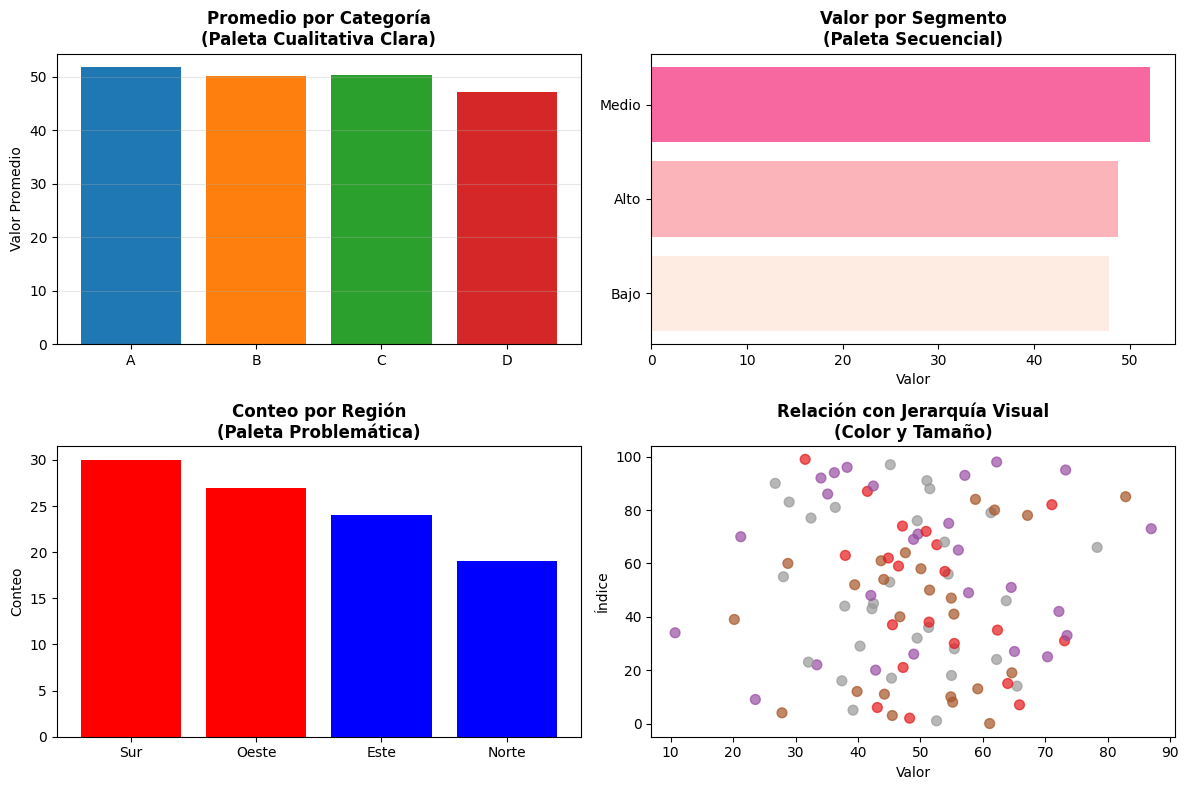

✔ Evidencia guardada como 'principios_visuales_paletas_color.png'


In [8]:
# Crear figura con 4 subgráficos
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 8))

# =========================
# 1. Gráfico cualitativo (BUEN EJEMPLO)
# =========================
categoria_means = df.groupby('categoria')['valor'].mean()

ax1.bar(
    categoria_means.index,
    categoria_means.values,
    color=colores_cualitativos[:len(categoria_means)]
)

ax1.set_title(
    'Promedio por Categoría\n(Paleta Cualitativa Clara)',
    fontsize=12,
    fontweight='bold'
)
ax1.set_ylabel('Valor Promedio')
ax1.grid(axis='y', alpha=0.3)

# =========================
# 2. Gráfico secuencial (BUEN EJEMPLO)
# =========================
segmento_means = (
    df.groupby('segmento')['valor']
    .mean()
    .sort_values()
)

ax2.barh(
    segmento_means.index,
    segmento_means.values,
    color=colores_secuenciales[:len(segmento_means)]
)

ax2.set_title(
    'Valor por Segmento\n(Paleta Secuencial)',
    fontsize=12,
    fontweight='bold'
)
ax2.set_xlabel('Valor')

# =========================
# 3. Gráfico con colores problemáticos (MAL EJEMPLO)
# =========================
region_counts = df['region'].value_counts()

ax3.bar(
    region_counts.index,
    region_counts.values,
    color=['red', 'red', 'blue', 'blue']  # ejemplo intencionalmente malo
)

ax3.set_title(
    'Conteo por Región\n(Paleta Problemática)',
    fontsize=12,
    fontweight='bold'
)
ax3.set_ylabel('Conteo')

# =========================
# 4. Gráfico con jerarquía visual
# =========================
ax4.scatter(
    df['valor'],
    range(len(df)),
    c=df['categoria'].map({'A': 0, 'B': 1, 'C': 2, 'D': 3}),
    cmap='Set1',
    alpha=0.7,
    s=50
)

ax4.set_title(
    'Relación con Jerarquía Visual\n(Color y Tamaño)',
    fontsize=12,
    fontweight='bold'
)
ax4.set_xlabel('Valor')
ax4.set_ylabel('Índice')

# Ajustes finales
plt.tight_layout()

# 👉 GUARDAR EVIDENCIA
plt.savefig(
    'principios_visuales_paletas_color.png',
    dpi=120,
    bbox_inches='tight'
)

plt.show()

print("✔ Evidencia guardada como 'principios_visuales_paletas_color.png'")

In [9]:
# Función simplificada para evaluación conceptual de contraste
def evaluar_accesibilidad():
    print("Evaluación de accesibilidad de las visualizaciones:\n")
    
    print("✔ Contraste:")
    print("- Asegurar contraste suficiente entre texto y fondo")
    print("- Recomendación WCAG: mínimo 4.5:1 para texto normal\n")
    
    print("✔ Daltonismo:")
    print("- Evitar depender solo del color rojo-verde")
    print("- Usar diferencias de luminancia y/o formas\n")
    
    print("✔ Escala de grises:")
    print("- Verificar que el gráfico sea interpretable sin color\n")
    
    print("✔ Jerarquía visual:")
    print("- Tamaño, posición y etiquetas refuerzan el mensaje\n")
    
    print("✔ Herramientas recomendadas:")
    print("- WebAIM Contrast Checker")
    print("- Simuladores de daltonismo")
    
evaluar_accesibilidad()

Evaluación de accesibilidad de las visualizaciones:

✔ Contraste:
- Asegurar contraste suficiente entre texto y fondo
- Recomendación WCAG: mínimo 4.5:1 para texto normal

✔ Daltonismo:
- Evitar depender solo del color rojo-verde
- Usar diferencias de luminancia y/o formas

✔ Escala de grises:
- Verificar que el gráfico sea interpretable sin color

✔ Jerarquía visual:
- Tamaño, posición y etiquetas refuerzan el mensaje

✔ Herramientas recomendadas:
- WebAIM Contrast Checker
- Simuladores de daltonismo


Verificación: impacto de los principios visuales en la comunicación de insights

Al comparar los gráficos generados, se observa claramente cómo la aplicación (o mala aplicación) de principios visuales afecta la comprensión de los datos:

1. Jerarquía visual
En los gráficos bien diseñados, los títulos, tamaños y posiciones guían la atención del observador hacia la información más relevante. Esto permite identificar patrones y comparaciones sin esfuerzo consciente. En contraste, la falta de jerarquía visual obliga al usuario a analizar activamente cada elemento, aumentando la carga cognitiva.

2. Uso del color
Las paletas cualitativas y secuenciales aplicadas correctamente permiten distinguir categorías y magnitudes de forma inmediata, aprovechando el procesamiento visual automático. El gráfico con paleta problemática demuestra que el uso de colores similares sin significado semántico genera confusión y dificulta la interpretación de los datos.

3. Composición y orden visual
La disposición consistente de los elementos, el uso de alineación y espacio en blanco, y la eliminación de ruido visual facilitan un flujo de lectura natural. Los gráficos bien compuestos comunican el insight principal rápidamente, mientras que una composición desordenada retrasa o distorsiona la comprensión.

Conclusión
Los gráficos que aplican correctamente jerarquía, color y composición comunican insights de forma clara, rápida y accesible. Aquellos que ignoran estos principios aumentan la carga cognitiva y reducen la efectividad de la visualización como herramienta analítica.

In [10]:
# Recalcular tablas (por seguridad y reproducibilidad)
categoria_means = (
    df.groupby('categoria')['valor']
    .mean()
    .reset_index(name='valor_promedio')
)

segmento_means = (
    df.groupby('segmento')['valor']
    .mean()
    .sort_values()
    .reset_index(name='valor_promedio')
)

region_counts = (
    df['region']
    .value_counts()
    .reset_index()
    .rename(columns={'index': 'region', 'region': 'conteo'})
)

# Exportar a Excel con múltiples hojas
nombre_archivo = "dataset_paletas_color_dia1.xlsx"

with pd.ExcelWriter(nombre_archivo, engine='openpyxl') as writer:
    df.to_excel(writer, sheet_name='dataset_original', index=False)
    categoria_means.to_excel(writer, sheet_name='promedio_por_categoria', index=False)
    segmento_means.to_excel(writer, sheet_name='promedio_por_segmento', index=False)
    region_counts.to_excel(writer, sheet_name='conteo_por_region', index=False)

print(f"✔ Archivo Excel generado con dataset y tablas: '{nombre_archivo}'")

✔ Archivo Excel generado con dataset y tablas: 'dataset_paletas_color_dia1.xlsx'
